# **Import and Install Necessary Packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import os

from sklearn.cluster import KMeans

RANDOM_STATE = 1234

# **Load Processed SFA Data and PCD (After) Data** 

In [2]:
BASE_CLEANED_DATA_PATH = './cleaned_data'
BASE_PROCESSED_DATA_PATH = './processed_data'

df_sfa = pd.read_csv(f'{BASE_PROCESSED_DATA_PATH}/SFA_MERGE.csv')
#remove index column
df_sfa = df_sfa.iloc[:, 1:]
#format time_aq column to datetime format (frequency = second) and then rename column 'time_aq' to 'date_time'
df_sfa['time_aq'] = pd.to_datetime(df_sfa['time_aq'], format = '%Y-%m-%d %H:%M:%S').dt.floor('S')
df_sfa.sort_values(by = 'time_aq', inplace = True)

df_sfa

C:\Users\jameb\AppData\Local\Temp\ipykernel_37208\908448294.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sfa = pd.read_csv(f'{BASE_PROCESSED_DATA_PATH}/SFA_MERGE.csv')


,device_id,time_aq,temp,humid,pm25_corrected,pm10_corrected,name,lat,long,province
0,30AEA49CC204,2020-07-20 18:16:44,35.8,59.0,9.1,10.6,"Building 3, Faculty of Engineering, Chulalongk...",13.736983,100.533476,Bangkok
111112,868333030873646,2020-07-20 18:17:42,31.2,78.3,14.1,29.1,Government Public Relations Department,13.783098,100.540368,Bangkok
115452,868333030868281,2020-07-20 18:17:52,33.1,67.9,11.2,23.1,Department of Water Resources,13.785348,100.539084,Bangkok
119844,868333030879387,2020-07-20 18:18:23,29.3,83.2,12.6,26.8,Testing station 1,13.824576,100.579485,Bangkok
1,30AEA49CC204,2020-07-20 18:21:59,35.8,61.0,7.9,8.4,"Building 3, Faculty of Engineering, Chulalongk...",13.736983,100.533476,Bangkok
...,...,...,...,...,...,...,...,...,...,...
7896960,868333031257021,2021-12-09 20:26:10,28.3,57.2,15.6,32.0,Benchama Maharat School,15.238900,104.838400,Ubon Ratchathani
7799822,868333031271493,2021-12-09 20:26:13,29.9,72.5,73.6,125.2,Anubanphichit School,16.442358,100.346897,Phichit
5648129,868333031259399,2021-12-09 20:26:14,NaN,NaN,42.4,79.0,Wat Sawang Arom School,14.216829,100.764200,Phra Nakhon Si Ayutthaya
1692969,868333031224807,2021-12-09 20:26:17,34.3,57.5,24.5,44.7,(3) Building 8 Baan Ua Arthorn Bangchalong Pro...,13.601660,100.747640,Samut Prakan


In [3]:
#PCD After
df_pcd_after = pd.read_csv(f'{BASE_CLEANED_DATA_PATH}/cleaned_pcd_data_after.csv')
df_pcd_after['date_time'] = pd.to_datetime(df_pcd_after['date_time'], format = '%Y-%m-%d %H:%M:%S')

df_pcd_after

,date_time,stationID,nameTH,nameEN,lat,long,PM25,PM10,NO2,SO2,CO,O3,AQI,areaTH,areaEN,province
0,2020-07-20 19:00:00,76t,ศูนย์การศึกษานอกโรงเรียน,"Non-Formal Education Centre, Mea Sot",16.750102,98.591312,8.0,22.0,3.0,0.0,0.12,15.0,1,"ต.แม่ปะ อ.แม่สอด, ตาก","MaePa, MaeSot, Tak",Tak
1,2020-07-20 19:00:00,bkp71t,สำนักงานเขตสวนหลวง,"Suan Luang District Office, Bangkok",13.731051,100.651705,9.0,22.0,0.0,0.0,0.00,0.0,1,"ริมถนนพัฒนาการ เขตสวนหลวง, กรุงเทพฯ","Suan Luang, Bangkok",Bangkok
2,2020-07-20 19:00:00,bkp70t,ริมถนนซอยสุขุมวิท 63,"Soi Sukhumwit 63 Roadside Wattana, Bangkok",13.722096,100.584559,15.0,53.0,0.0,0.0,0.00,0.0,2,"ริมถนนซอยสุขุมวิท 63 เขตวัฒนา, กรุงเทพฯ","Soi Sukhumwit 63 Roadside, Wattana, Bangkok",Bangkok
3,2020-07-20 19:00:00,bkp69t,ธนาคารกรุงศรีอยุธยา สำนักงานใหญ่,"Bank of Ayuthaya Head Office Yan Nawa, Bangkok",13.679226,100.546870,16.0,0.0,0.0,0.0,0.00,0.0,1,"ริมถนนพระราม 3 เขตยานนาวา, กรุงเทพฯ","RamaIII Roadside, Yan Nawa, Bangkok",Bangkok
4,2020-07-20 19:00:00,bkp68t,สี่แยกถนนตก,Thanon Tok Intersection,13.697252,100.497185,23.0,0.0,0.0,0.0,0.00,0.0,1,"ริมถนนพระราม 3-เจริญกรุง เขตบางคอแหลม, กรุงเทพฯ","RamaIII Roadside (Chareon Krung), Bang Kho Lae...",Bangkok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1748632,2022-01-30 18:00:00,o23,ศาลากลางจังหวัดชัยภูมิ,Chaiyaphum City Hall,15.808061,102.031993,36.0,0.0,0.0,0.0,0.00,0.0,2,"ต.ในเมือง อ.เมืองชัยภูมิ, ชัยภูมิ","Nai Mueang Subdistrict, Mueang Chaiyaphum Dis...",Chaiyaphum
1748633,2022-01-30 18:00:00,43t,ศูนย์บริการสาธารณสุขเทศบาลภูเก็ต,Municipal Health Center,7.884508,98.391318,16.0,33.0,7.0,1.0,0.38,19.0,1,"ต.ตลาดใหญ่ อ.เมือง, ภูเก็ต","Talat Yai, Mueang, Phuket",Phuket
1748634,2022-01-30 18:00:00,53t,สถานีตำรวจนครบาลโชคชัย,Chokchai Police Station,13.795425,100.593023,22.0,32.0,6.0,0.0,2.22,0.0,1,"ริมถนนลาดพร้าว เขตวังทองหลาง, กรุงเทพฯ","Lat Phrao Rd. Khet Wang Thonglang, Bangkok",Bangkok
1748635,2022-01-30 18:00:00,bkp76t,สำนักงานเขตบางกะปิ,"Bang Kapi District Office, Bangkok",13.766478,100.647785,31.0,0.0,0.0,0.0,0.00,0.0,2,"ริมถนนนวมินทร์ แยกบางกะปิ เขตบางกะปิ, กรุงเทพฯ","Navamin Roadside, Bang Kapi, Bangkok",Bangkok


# **Mergeing Data**

In [4]:
def mapping_column_names(c):
    if c in ['time_aq']:
        return 'date_time'
    elif c in ['device_id', 'stationID']:
        return 'ID'
    elif c in ['name']:
        return 'nameEN'
    elif c in ['pm25_corrected', 'PM25']:
        return 'PM2_5'
    elif c in ['pm10_corrected']:
        return 'PM10'
    else:
        return c

#map column name
for df in [df_sfa, df_pcd_after]:
    new_columns_name = list(map(lambda c: mapping_column_names(c), df.columns))
    df.columns = new_columns_name

#choose only interested column
df_sfa = df_sfa[['ID', 'date_time', 'PM2_5', 'PM10', 'nameEN', 'lat', 'long', 'province']]
df_pcd_after = df_pcd_after[['ID', 'date_time', 'PM2_5', 'PM10', 'nameEN', 'lat', 'long', 'province']]

#concatenate
df_concated = pd.concat([df_sfa, df_pcd_after], axis = 0)
df_concated.sort_values(by = 'date_time', inplace = True)

#add year and month column
df_concated['year'] = df_concated['date_time'].dt.year
df_concated['month'] = df_concated['date_time'].dt.month

In [5]:
df_concated

,ID,date_time,PM2_5,PM10,nameEN,lat,long,province,year,month
0,30AEA49CC204,2020-07-20 18:16:44,9.1,10.6,"Building 3, Faculty of Engineering, Chulalongk...",13.736983,100.533476,Bangkok,2020,7
111112,868333030873646,2020-07-20 18:17:42,14.1,29.1,Government Public Relations Department,13.783098,100.540368,Bangkok,2020,7
115452,868333030868281,2020-07-20 18:17:52,11.2,23.1,Department of Water Resources,13.785348,100.539084,Bangkok,2020,7
119844,868333030879387,2020-07-20 18:18:23,12.6,26.8,Testing station 1,13.824576,100.579485,Bangkok,2020,7
1,30AEA49CC204,2020-07-20 18:21:59,7.9,8.4,"Building 3, Faculty of Engineering, Chulalongk...",13.736983,100.533476,Bangkok,2020,7
...,...,...,...,...,...,...,...,...,...,...
1748606,03t,2022-01-30 18:00:00,30.0,76.0,Highway NO.3902 km.13 +600,13.636514,100.414262,Bangkok,2022,1
1748607,62t,2022-01-30 18:00:00,24.0,39.0,"City Hall, Narathiwat",6.426885,101.823005,Narathiwat,2022,1
1748608,34t,2022-01-30 18:00:00,23.0,41.0,"Environment Agency Section 13, Chonburi",13.355065,100.977777,Chon Buri,2022,1
1748598,24t,2022-01-30 18:00:00,57.0,124.0,Na Phralan Police Station,14.685833,100.871996,Saraburi,2022,1


# **Observe Merged PCD After and SFA Data**

How many devices in each province?

Total devices: 554


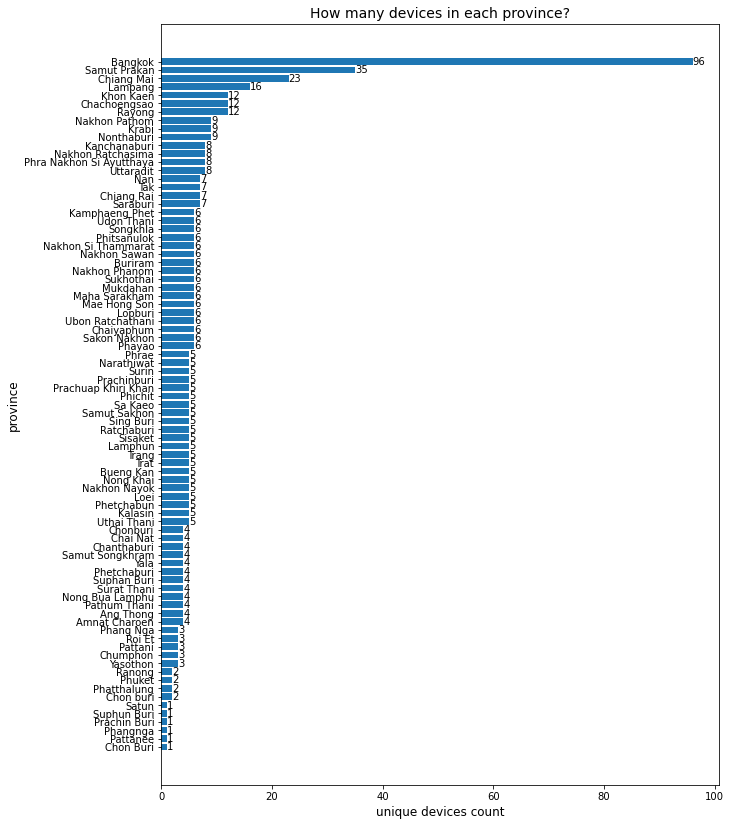

In [6]:
unique_devices_in_province = df_concated.groupby('province')['ID'].nunique().sort_values(ascending = False)

print(f"Total devices: {df_concated['ID'].nunique()}")
fig, ax = plt.subplots()
fig.set_size_inches(10, 14)
y_pos = np.arange(len(unique_devices_in_province))
hbars =  ax.barh(y_pos, unique_devices_in_province, align='center')
ax.set_yticks(y_pos, unique_devices_in_province.index)
ax.invert_yaxis()
ax.set_xlabel('unique devices count', fontsize = 12)
ax.set_ylabel('province', fontsize = 12)
ax.set_title('How many devices in each province?', fontsize = 14)
ax.bar_label(hbars)
plt.show()

# **Select 4 Provinces which locates in Bangkok Metropolitan Area**
Bangkok, Samut Prakan, Nakhon Pathom, Nonthaburi

In [7]:
df_bkks = df_concated[df_concated['province'].str.contains('Bangkok|Samut Prakan|Nakhon Pathom|Nonthaburi')].copy().reset_index(drop = True)
print(f'There are {df_bkks["ID"].nunique()} unique areas interested in bangkok metropolitan area.')
df_bkks

There are 149 unique areas interested in bangkok metropolitan area.


,ID,date_time,PM2_5,PM10,nameEN,lat,long,province,year,month
0,30AEA49CC204,2020-07-20 18:16:44,9.1,10.6,"Building 3, Faculty of Engineering, Chulalongk...",13.736983,100.533476,Bangkok,2020,7
1,868333030873646,2020-07-20 18:17:42,14.1,29.1,Government Public Relations Department,13.783098,100.540368,Bangkok,2020,7
2,868333030868281,2020-07-20 18:17:52,11.2,23.1,Department of Water Resources,13.785348,100.539084,Bangkok,2020,7
3,868333030879387,2020-07-20 18:18:23,12.6,26.8,Testing station 1,13.824576,100.579485,Bangkok,2020,7
4,30AEA49CC204,2020-07-20 18:21:59,7.9,8.4,"Building 3, Faculty of Engineering, Chulalongk...",13.736983,100.533476,Bangkok,2020,7
...,...,...,...,...,...,...,...,...,...,...
5099239,81t,2022-01-30 18:00:00,22.0,38.0,Water reservoir,13.832076,100.057961,Nakhon Pathom,2022,1
5099240,bkp76t,2022-01-30 18:00:00,31.0,0.0,"Bang Kapi District Office, Bangkok",13.766478,100.647785,Bangkok,2022,1
5099241,54t,2022-01-30 18:00:00,32.0,59.0,National Housing Authority Dindaeng,13.762517,100.550200,Bangkok,2022,1
5099242,03t,2022-01-30 18:00:00,30.0,76.0,Highway NO.3902 km.13 +600,13.636514,100.414262,Bangkok,2022,1


Calculate monthly average PM2.5 for each ID

In [8]:
def calculate_average_monthly_PM25(df):
    df_month_pm25_avg = df.groupby(['year', 'month', 'ID'])['PM2_5'].mean().to_frame().reset_index()
    df_month_pm25_avg['date'] = df_month_pm25_avg['year'].astype('string') + '-' + df_month_pm25_avg['month'].astype('string')
    df_month_pm25_avg['date'] = pd.to_datetime(df_month_pm25_avg['date'], format = '%Y-%m').dt.to_period('M')
    df_month_pm25_avg = df_month_pm25_avg.pivot(index = 'date', columns = 'ID', values = 'PM2_5')
    return df_month_pm25_avg

In [9]:
df_bkks_month_pm25_avg = calculate_average_monthly_PM25(df_bkks)
df_bkks_month_pm25_avg

ID,868333031224807,868333031244573,868333031250919,868333031251776,868333031251800,868333031252881,868333031253012,868333031254515,868333031254556,868333031254853,...,bkp95t,bkp96t,bkp97t,bkp98t,bkp99t,m3,m7,o10,o27,o59
date,,,,,,,,,,,,,,,,,,,,,
2020-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.125954,10.172932,17.043651,13.086957,9.129310,NaN,NaN,NaN,NaN,NaN
2020-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.688752,10.706790,16.063927,14.166384,10.187117,NaN,NaN,NaN,NaN,NaN
2020-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.513361,10.535311,16.241573,14.465046,10.183099,NaN,NaN,NaN,NaN,NaN
2020-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.108844,15.578801,19.738836,22.558245,14.670922,NaN,NaN,NaN,NaN,NaN
2020-11,14.604172,17.271583,NaN,16.983153,16.458503,16.670769,NaN,17.322629,17.748499,35.934291,...,27.301120,23.030035,28.928270,31.737705,21.582857,NaN,NaN,NaN,NaN,NaN
2020-12,32.791449,34.639723,25.638611,32.358232,33.923849,36.445596,27.133321,12.412500,34.932117,33.345881,...,35.296961,29.620905,35.465021,38.799133,27.626772,30.000000,NaN,NaN,NaN,NaN
2021-01,45.567535,51.350139,36.373696,48.459053,48.613066,52.283809,NaN,52.634887,51.459147,9.142106,...,43.794355,39.670699,45.103495,48.141129,38.955585,NaN,NaN,NaN,NaN,NaN
2021-02,44.510477,49.939742,40.301303,48.269358,48.129972,51.846458,NaN,50.926557,50.232174,9.253829,...,45.869048,42.406250,47.734724,49.903130,41.802083,NaN,NaN,NaN,42.116592,NaN
2021-03,25.959980,23.823040,23.752649,27.601933,26.871267,29.715843,NaN,29.506539,27.461451,8.944261,...,31.248656,25.842953,30.718121,31.277852,24.747651,NaN,NaN,NaN,22.565860,NaN


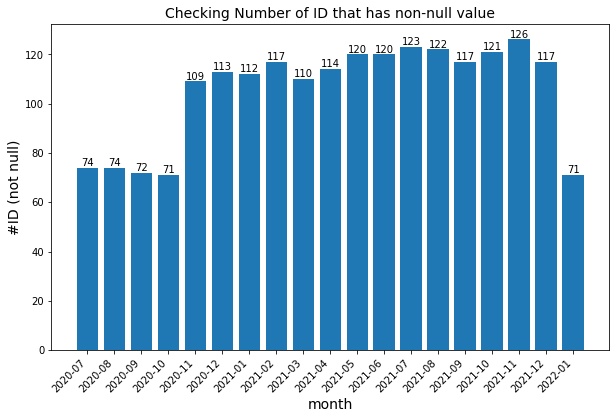

In [10]:
not_null = df_bkks_month_pm25_avg.notna().sum(axis = 1)

x = np.arange(len(not_null))
plt.figure(figsize = (10, 6))
bar = plt.bar(x, not_null)
plt.xticks(x, not_null.index, rotation = 45, ha = 'right')
plt.xlabel('month', fontsize = 14)
plt.ylabel('#ID (not null)', fontsize = 14)
plt.title('Checking Number of ID that has non-null value', fontsize = 14)
plt.bar_label(bar, not_null)
plt.show()

Select year 2021

In [11]:
def filter_columns_non_null(df, thresh):
    print(f'There are total of {len(df.columns)} columns before removing.')
    selected_columns = df.columns[(df.notna().sum(axis = 0) / df.shape[0]) > thresh]
    df2 = df.loc[:, selected_columns].copy()
    print(f'There are total of {len(df2.columns)} columns after removing.')
    return df2

In [12]:
THRESH_KMEANS = 0.75
N_CLUSTERS = 3

df_bkks_month_pm25_avg_2021 = df_bkks_month_pm25_avg[df_bkks_month_pm25_avg.index.year == 2021].copy()

#select ID which has non-null value >= THRESH_KMEANS
df_bkks_month_pm25_avg_2021 = filter_columns_non_null(df_bkks_month_pm25_avg_2021, THRESH_KMEANS)

#impute missing by interpolation
df_bkks_month_pm25_avg_2021.interpolate(inplace = True)

#impute missing value at the beginning by fill mean
compute_IDs = df_bkks_month_pm25_avg_2021.columns[df_bkks_month_pm25_avg_2021.notna().sum(axis = 0) != df_bkks_month_pm25_avg_2021.shape[0]]
for ID in compute_IDs:
    df_bkks_month_pm25_avg_2021[ID].fillna(df_bkks_month_pm25_avg_2021[ID].mean(), inplace = True)

df_bkks_month_pm25_avg_2021

There are total of 149 columns before removing.
There are total of 106 columns after removing.


ID,868333031224807,868333031244573,868333031251776,868333031251800,868333031252881,868333031254515,868333031254556,868333031254853,868333031254929,868333031255249,...,bkp91t,bkp92t,bkp93t,bkp94t,bkp95t,bkp96t,bkp97t,bkp98t,bkp99t,o27
date,,,,,,,,,,,,,,,,,,,,,
2021-01,45.567535,51.350139,48.459053,48.613066,52.283809,52.634887,51.459147,9.142106,39.766042,61.598764,...,43.620968,45.520161,38.946237,48.620968,43.794355,39.670699,45.103495,48.141129,38.955585,17.470884
2021-02,44.510477,49.939742,48.269358,48.129972,51.846458,50.926557,50.232174,9.253829,54.904022,59.355134,...,45.016369,41.320417,41.046131,50.407738,45.869048,42.406250,47.734724,49.903130,41.802083,42.116592
2021-03,25.959980,23.823040,27.601933,26.871267,29.715843,29.506539,27.461451,8.944261,34.660217,32.431735,...,28.954362,30.531544,24.491275,33.013441,31.248656,25.842953,30.718121,31.277852,24.747651,22.565860
2021-04,22.066516,23.134953,23.974876,22.715804,25.129518,24.103219,19.251696,15.296779,16.017263,13.845444,...,22.588317,27.777469,19.312935,31.472879,23.606398,20.956885,23.151599,25.159944,18.894298,17.159944
2021-05,17.287409,18.081272,18.491244,17.132476,18.572082,17.848762,12.845629,14.755268,12.350017,11.969098,...,16.616327,19.341497,12.827211,25.091156,15.642177,13.919728,15.929252,16.108844,13.282993,12.179592
2021-06,13.121094,13.339195,13.553391,11.839962,13.783511,14.416147,7.777205,10.724313,15.739340,10.114029,...,14.500695,18.173853,9.980529,22.365786,12.965229,10.661111,11.510431,13.866481,9.784423,10.547049
2021-07,12.215657,12.559547,12.742717,11.404099,12.979643,11.961240,5.237681,10.305992,6.517786,8.266569,...,12.324361,16.382234,8.698520,15.760431,11.679677,9.822342,9.320323,10.358008,8.550471,8.684636
2021-08,11.952093,12.028547,12.550439,10.758624,12.776240,12.117150,5.088880,9.925219,5.800279,7.345115,...,12.342029,16.420290,8.860870,15.430435,12.578261,9.944767,9.969565,10.989855,8.913043,8.866860
2021-09,15.465351,15.242280,16.604653,11.700111,15.738786,12.938986,6.450487,7.411581,8.938808,6.445373,...,15.936111,18.615278,10.913889,18.206944,14.313889,11.834951,12.355556,13.784722,10.323611,10.460362


Perform KMeans Clustering

In [13]:
def KMeans_Clustering(X, n_clusters = N_CLUSTERS, random_state = RANDOM_STATE):
    kmeans = KMeans(n_clusters = n_clusters, random_state = random_state).fit(X)
    return kmeans

In [26]:
X_k_means = np.array(df_bkks_month_pm25_avg_2021).T
print(f'X_k_means shape = {X_k_means.shape}')

kmeans = KMeans_Clustering(X_k_means, n_clusters = N_CLUSTERS, random_state = RANDOM_STATE)
print(kmeans.labels_)

X_k_means shape = (106, 12)
[2 0 0 2 0 0 2 2 2 2 0 2 0 2 0 2 0 2 0 1 2 2 2 2 2 0 2 2 0 2 2 2 2 0 0 0 2
 0 2 2 2 2 2 2 0 0 2 2 0 0 0 0 2 2 2 0 0 2 2 2 0 0 0 2 2 2 0 2 0 0 0 2 0 2
 0 2 2 0 2 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 2 2 0 2 2]


Mapping Results From KMeans Clustering onto a map

In [27]:
def color_mapping(idx):
    COLORS = ['green', 'red', 'blue', 'purple', 'orange', 'black', 'cyan']
    return COLORS[idx]

def plot_map(df_avg, mappings, k_mean_label):
    map_kmeans = folium.Map(
        location = (13.736717, 100.523186),
        zoom_start = 11
    )
    for (ID, c) in zip(df_avg.columns, k_mean_label):
        lat = mappings['lat'][ID]
        long = mappings['long'][ID]
        nameEN = mappings['nameEN'][ID]
        province =  mappings['province'][ID]

        hover_html = f'''<b>{nameEN}</b><br>
                     <b>ID:</b> {ID}<br>
                     <b>Province</b>: {province}
                    '''
        folium.CircleMarker((lat, long), tooltip = hover_html, popup = hover_html, radius = 6, fill_color = color_mapping(c), color = color_mapping(c)).add_to(map_kmeans)
    return map_kmeans

In [28]:
# create mapping for map ID to its location data =======================
location_columns = ['nameEN', 'lat', 'long', 'province']
df_bkks_mapping = df_bkks.groupby('ID')[location_columns].first()

mappings = {}
for c in location_columns:
    mappings[c] = dict(df_bkks_mapping[c])
# =======================================================================

map_kmeans = plot_map(df_bkks_month_pm25_avg_2021, mappings, kmeans.labels_)
map_kmeans

There are something wrong with device at 'Building 3, Chulalongkorn University Demonstration Secondary School'
So, we plot PM2.5 of devices around that area which are 'Multipurpose Building, Chulalongkorn University Demonstration Secondary School' and 'Samyan Mitrtown'

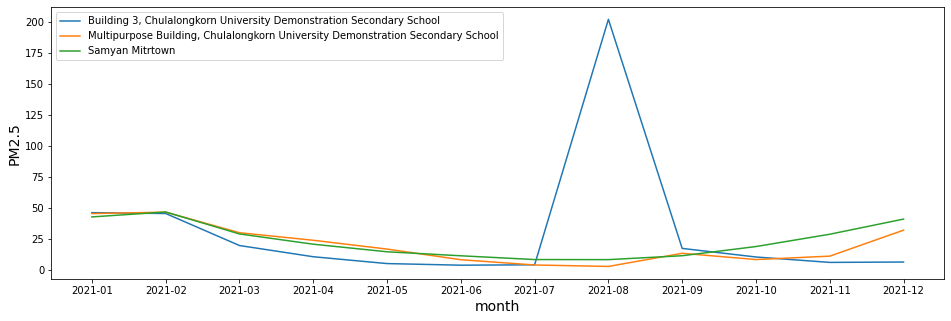

In [29]:
interested_IDs = [868333031261064, 868333031256411, 'bkp65t']

plt.figure(figsize = (16, 5))
for ID in interested_IDs:
    x = np.arange(len(df_bkks_month_pm25_avg_2021.loc[:, ID]))
    plt.plot(x, df_bkks_month_pm25_avg_2021.loc[:, ID], label = mappings['nameEN'][ID])
    plt.xticks(x, df_bkks_month_pm25_avg_2021.loc[:, ID].index)

plt.ylabel('PM2.5', fontsize = 14)
plt.xlabel('month', fontsize = 14)
plt.legend()
plt.show()


In [30]:
#examing data
df_examine = df_bkks[(df_bkks['ID'] == 868333031261064) & (df_bkks['date_time'] >= '2021-08-01') & (df_bkks['date_time'] < '2021-09-01')]
df_examine


,ID,date_time,PM2_5,PM10,nameEN,lat,long,province,year,month
3653654,868333031261064,2021-08-18 15:57:58,0.0,14.2,"Building 3, Chulalongkorn University Demonstra...",13.735982,100.526915,Bangkok,2021,8
3653828,868333031261064,2021-08-18 16:02:58,0.0,14.2,"Building 3, Chulalongkorn University Demonstra...",13.735982,100.526915,Bangkok,2021,8
3677011,868333031261064,2021-08-20 11:48:00,442.3,1193.5,"Building 3, Chulalongkorn University Demonstra...",13.735982,100.526915,Bangkok,2021,8
3677054,868333031261064,2021-08-20 11:53:00,524.1,1350.7,"Building 3, Chulalongkorn University Demonstra...",13.735982,100.526915,Bangkok,2021,8
3677097,868333031261064,2021-08-20 11:58:01,42.4,102.1,"Building 3, Chulalongkorn University Demonstra...",13.735982,100.526915,Bangkok,2021,8


In [31]:
#drop rows that has strange value 
df_bkks_fixed = df_bkks.drop(df_examine.index)
df_bkks_fixed

,ID,date_time,PM2_5,PM10,nameEN,lat,long,province,year,month
0,30AEA49CC204,2020-07-20 18:16:44,9.1,10.6,"Building 3, Faculty of Engineering, Chulalongk...",13.736983,100.533476,Bangkok,2020,7
1,868333030873646,2020-07-20 18:17:42,14.1,29.1,Government Public Relations Department,13.783098,100.540368,Bangkok,2020,7
2,868333030868281,2020-07-20 18:17:52,11.2,23.1,Department of Water Resources,13.785348,100.539084,Bangkok,2020,7
3,868333030879387,2020-07-20 18:18:23,12.6,26.8,Testing station 1,13.824576,100.579485,Bangkok,2020,7
4,30AEA49CC204,2020-07-20 18:21:59,7.9,8.4,"Building 3, Faculty of Engineering, Chulalongk...",13.736983,100.533476,Bangkok,2020,7
...,...,...,...,...,...,...,...,...,...,...
5099239,81t,2022-01-30 18:00:00,22.0,38.0,Water reservoir,13.832076,100.057961,Nakhon Pathom,2022,1
5099240,bkp76t,2022-01-30 18:00:00,31.0,0.0,"Bang Kapi District Office, Bangkok",13.766478,100.647785,Bangkok,2022,1
5099241,54t,2022-01-30 18:00:00,32.0,59.0,National Housing Authority Dindaeng,13.762517,100.550200,Bangkok,2022,1
5099242,03t,2022-01-30 18:00:00,30.0,76.0,Highway NO.3902 km.13 +600,13.636514,100.414262,Bangkok,2022,1


Recompute monthly average PM2.5, select only year 2021, and perform KMeans

In [32]:
df_bkks_month_pm25_avg_fixed = calculate_average_monthly_PM25(df_bkks_fixed)
df_bkks_month_pm25_avg_2021_fixed = df_bkks_month_pm25_avg_fixed[df_bkks_month_pm25_avg_fixed.index.year == 2021].copy()
#select ID which has non-null value >= THRESH_KMEANS
df_bkks_month_pm25_avg_2021_fixed = filter_columns_non_null(df_bkks_month_pm25_avg_2021_fixed, THRESH_KMEANS)

#impute missing by interpolation
df_bkks_month_pm25_avg_2021_fixed.interpolate(inplace = True)

#impute missing value at the beginning by fill mean
compute_IDs = df_bkks_month_pm25_avg_2021_fixed.columns[df_bkks_month_pm25_avg_2021_fixed.notna().sum(axis = 0) != df_bkks_month_pm25_avg_2021_fixed.shape[0]]
for ID in compute_IDs:
    df_bkks_month_pm25_avg_2021_fixed[ID].fillna(df_bkks_month_pm25_avg_2021_fixed[ID].mean(), inplace = True)

kmeans_fixed = KMeans_Clustering(np.array(df_bkks_month_pm25_avg_2021_fixed).T, n_clusters = N_CLUSTERS, random_state = RANDOM_STATE)

map_kmeans_fixed = plot_map(df_bkks_month_pm25_avg_2021_fixed, mappings, kmeans_fixed.labels_)

#save map HTML
MAP_SAVE_PATH = f'{BASE_PROCESSED_DATA_PATH}/clustering_maps'
if not os.path.exists(MAP_SAVE_PATH):
    os.mkdir(MAP_SAVE_PATH)
map_kmeans_fixed.save(f'{MAP_SAVE_PATH}/bangkok_metropolitan_clustering.html')

map_kmeans_fixed

There are total of 149 columns before removing.
There are total of 106 columns after removing.


Plot Graph

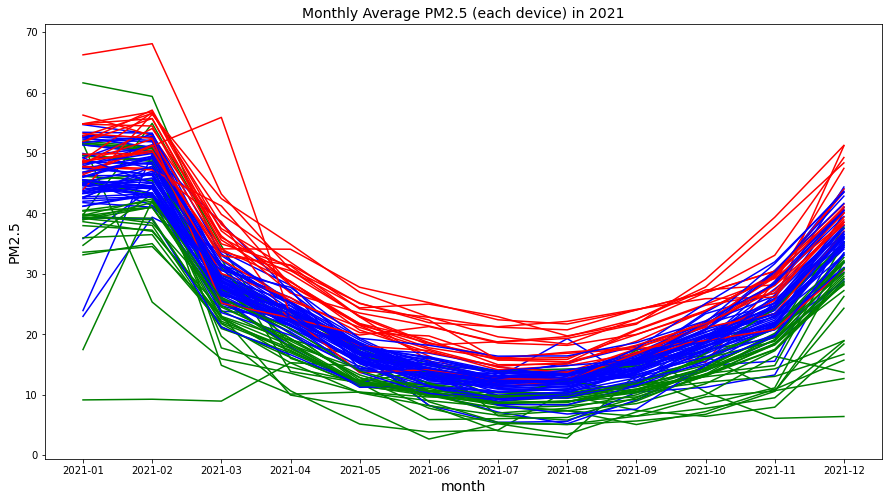

In [33]:
x = np.arange(df_bkks_month_pm25_avg_2021_fixed.shape[0])

plt.figure(figsize = (15, 8))
for idx, ID in enumerate(df_bkks_month_pm25_avg_2021_fixed.columns):
    plt.plot(x, df_bkks_month_pm25_avg_2021_fixed.loc[:, ID], color = color_mapping(kmeans_fixed.labels_[idx]))

plt.xticks(x, df_bkks_month_pm25_avg_2021_fixed.index)
plt.xlabel('month', fontsize = 14)
plt.ylabel('PM2.5', fontsize = 14)
plt.title('Monthly Average PM2.5 (each device) in 2021', fontsize = 14)
plt.show()

In [34]:
df_grouped = df_bkks_month_pm25_avg_2021_fixed.T
df_grouped['group'] = kmeans_fixed.labels_
df_grouped

date,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,group
ID,,,,,,,,,,,,,
868333031224807,45.567535,44.510477,25.959980,22.066516,17.287409,13.121094,12.215657,11.952093,15.465351,19.100719,21.658287,30.280118,2
868333031244573,51.350139,49.939742,23.823040,23.134953,18.081272,13.339195,12.559547,12.028547,15.242280,19.708253,23.315567,34.321970,2
868333031251776,48.459053,48.269358,27.601933,23.974876,18.491244,13.553391,12.742717,12.550439,16.604653,20.420215,23.443036,34.077090,2
868333031251800,48.613066,48.129972,26.871267,22.715804,17.132476,11.839962,11.404099,10.758624,11.700111,13.934733,19.041251,29.058858,2
868333031252881,52.283809,51.846458,29.715843,25.129518,18.572082,13.783511,12.979643,12.776240,15.738786,23.403516,26.839129,37.522652,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
bkp96t,39.670699,42.406250,25.842953,20.956885,13.919728,10.661111,9.822342,9.944767,11.834951,15.986559,18.829847,30.911171,0
bkp97t,45.103495,47.734724,30.718121,23.151599,15.929252,11.510431,9.320323,9.969565,12.355556,15.114247,19.629526,33.440701,2
bkp98t,48.141129,49.903130,31.277852,25.159944,16.108844,13.866481,10.358008,10.989855,13.784722,18.474462,22.643454,36.555256,2


In [35]:
df_grouped_avg = df_grouped.groupby('group')[df_bkks_month_pm25_avg_2021_fixed.index].mean()
df_grouped_avg

date,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12
group,,,,,,,,,,,,
0,41.070893,41.772973,23.830630,17.353310,12.436017,10.138782,8.301555,8.564426,10.396039,12.730913,16.120841,26.521633
1,51.081627,53.829350,36.973633,28.707717,22.304213,19.640524,16.857100,16.872204,19.934106,23.710206,29.116954,41.991348
2,45.572541,46.795505,28.523245,23.224101,16.678708,13.485999,11.792409,12.039148,14.503843,18.869920,24.105761,36.286968


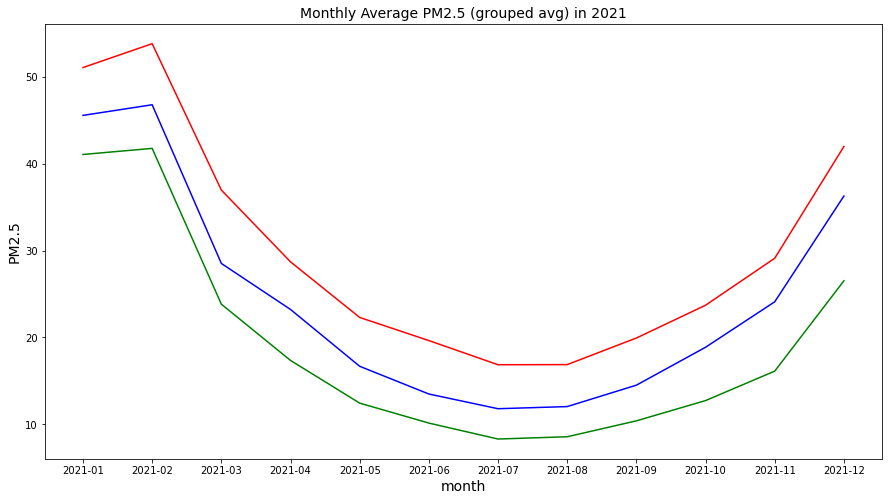

In [36]:
plt.figure(figsize = (15, 8))
x = np.arange(len(df_grouped_avg.columns))
for g in df_grouped_avg.index:
    plt.plot(x, df_grouped_avg.loc[g, :], color = color_mapping(g))
    
plt.xticks(x, df_bkks_month_pm25_avg_2021_fixed.index)
plt.xlabel('month', fontsize = 14)
plt.ylabel('PM2.5', fontsize = 14)
plt.title('Monthly Average PM2.5 (grouped avg) in 2021', fontsize = 14)
plt.show()

Save group information to each loation into csv file

In [25]:
df_g = pd.merge(df_grouped.reset_index(drop = False)[['ID', 'group']], df_bkks_mapping.reset_index(drop = False), on = 'ID', how = 'inner')
df_g['group'] = df_g['group'].map(color_mapping)
df_g.to_csv(f'{BASE_PROCESSED_DATA_PATH}/bkk_and_metropolitan_stations_clustering_2021.csv')
df_g

,ID,group,nameEN,lat,long,province
0,868333031224807,blue,(3) Building 8 Baan Ua Arthorn Bangchalong Pro...,13.601660,100.747640,Samut Prakan
1,868333031244573,blue,(13) Building 47 Baan Ua Arthorn Bangchalong P...,13.602600,100.750890,Samut Prakan
2,868333031251776,blue,(15) Building 57 Baan Ua Arthorn Bangchalong P...,13.601900,100.751630,Samut Prakan
3,868333031251800,blue,(12) Bangchalong Metropolitan Office,13.601250,100.749930,Samut Prakan
4,868333031252881,blue,(9) Building 17 Baan Ua Arthorn Bangchalong Pr...,13.600890,100.749320,Samut Prakan
...,...,...,...,...,...,...
101,bkp96t,green,"Ladphrao District Office, Bangkok",13.803587,100.607535,Bangkok
102,bkp97t,blue,"Lak Si District Office, Bangkok",13.887395,100.579247,Bangkok
103,bkp98t,blue,"Bang Khen District Office, Bangkok",13.873603,100.595839,Bangkok
104,bkp99t,green,"Saphan Sung District Office, Bangkok",13.768892,100.685743,Bangkok
